# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url +"&appid=" + weather_api_key + "&units=imperial"

In [6]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial


In [7]:
# set up lists to hold reponse info
name = []
Lat = []
Lng = []
temp_max = []
temp = []
humidity = []
clouds = []
speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
   
    
    # Create search query, make request and store in json
    query = query_url + "&q=" + city
   
    
    # Run an API request for each of the cities.
    try:
        response = requests.get(query).json()
        print(query)
        #response_json = response.json()
        #response = requests.get(query_url + city).json()
        
        name.append(response['name'])
        temp_max.append(response['main']['temp_max'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']["all"])
        speed.append(response['wind']['speed'])
        
        print(f"CITY FOUND.")
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

print(f"The latitude information received is: {Lat}")
print(f"The temperature information received is: {temp}")

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=tucson
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=saint-philippe
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=sistranda
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=glenwood springs
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=vostok
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=opuwo
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=punta arenas
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=shagonar
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=nikolskoye
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=hualmay
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=dikson
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=dobson
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=yulara
CITY FOUND.
http

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=ostrovnoy
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=tubuala
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=iqaluit
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=portland
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=iquique
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=carnarvon
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=robertsport
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=caravelas
CITY FOUN

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=port alfred
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=bosaso
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=palabuhanratu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=orlik
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=ribeira grande
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=itarema
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=beringovskiy
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=impe

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=troitskoye
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=rungata
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=jacareacanga
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=bunia
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=provideniya
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=lata
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=freeport
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=uren

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=ewa beach
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=hirara
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=egvekinot
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=flinders
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=noumea
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=maragogi
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=makakilo city
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=zhanatas
City not 

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=temaraia
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=colares
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=aflu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=aklavik
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=san patricio
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=tondano
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=winsum
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imper

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=viedma
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=yaounde
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=dalby
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=kitimat
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=tucurui
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=dauphin
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=port hedland
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=mogwase
CITY FOUND.
http:/

http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=vanavara
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=cocorit
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=aratos
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=syedove
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=athens
CITY FOUND.
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=barroualie
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imperial&q=skalistyy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?&appid=b0553ca11d23e7d8efa68ba9446d5cf2&units=imp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "name": name,
    "Lat": Lat,
    "Lng": Lng,
    "temp": temp,
    "temp_max": temp_max,
    "humidity": humidity,
    "clouds": clouds,
    "speed": speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,name,Lat,Lng,temp,temp_max,humidity,clouds,speed
0,Tucson,32.2217,-110.9265,91.18,94.23,44,0,11.50
1,Saint-Philippe,-21.3585,55.7679,66.54,67.59,75,35,11.63
2,Sistranda,63.7256,8.8340,62.56,62.56,77,79,12.30
3,Glenwood Springs,39.5505,-107.3248,76.68,89.89,31,0,0.00
4,Vostok,46.4856,135.8833,64.22,64.22,54,23,1.72
...,...,...,...,...,...,...,...,...
522,Whitianga,-36.8333,175.7000,58.42,58.42,84,100,12.21
523,Fukuechō,32.6881,128.8419,82.76,82.76,74,75,6.91
524,Griffith,41.5284,-87.4237,77.77,81.25,65,0,5.75
525,Coro,11.4045,-69.6734,82.31,82.31,77,75,17.18


In [9]:
weather_data_new = ["name","Lat","Lng","temp","temp_max","humidity","clouds","speed"]
weather_data = weather_data_new

In [10]:
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head()

,name,Lat,Lng,temp,temp_max,humidity,clouds,speed
0,Tucson,32.2217,-110.9265,91.18,94.23,44,0,11.50
1,Saint-Philippe,-21.3585,55.7679,66.54,67.59,75,35,11.63
2,Sistranda,63.7256,8.8340,62.56,62.56,77,79,12.30
3,Glenwood Springs,39.5505,-107.3248,76.68,89.89,31,0,0.00
4,Vostok,46.4856,135.8833,64.22,64.22,54,23,1.72


In [11]:
output = "weatherpy.csv"
weather_data_df.to_csv(output)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

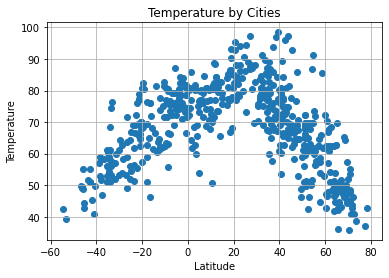

In [14]:
plt.scatter(weather_data_df["Lat"], weather_data_df["temp"], marker="o")
plt.title("Temperature by Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

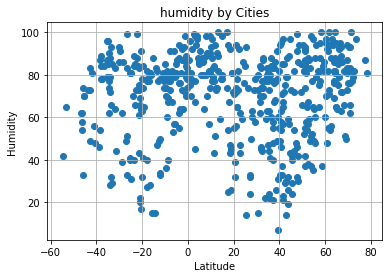

In [15]:
plt.scatter(weather_data_df["Lat"], weather_data_df["humidity"], marker="o")
plt.title("humidity by Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

In [16]:
weather_data_df.head()

,name,Lat,Lng,temp,temp_max,humidity,clouds,speed
0,Tucson,32.2217,-110.9265,91.18,94.23,44,0,11.50
1,Saint-Philippe,-21.3585,55.7679,66.54,67.59,75,35,11.63
2,Sistranda,63.7256,8.8340,62.56,62.56,77,79,12.30
3,Glenwood Springs,39.5505,-107.3248,76.68,89.89,31,0,0.00
4,Vostok,46.4856,135.8833,64.22,64.22,54,23,1.72


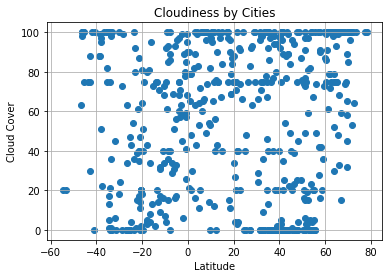

In [17]:
plt.scatter(weather_data_df["Lat"], weather_data_df["clouds"], marker="o")
plt.title("Cloudiness by Cities")
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

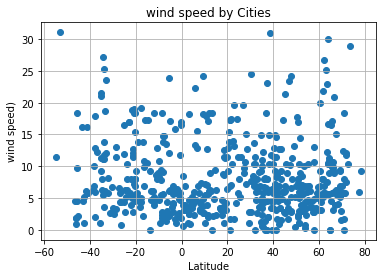

In [18]:
plt.scatter(weather_data_df["Lat"], weather_data_df["speed"], marker="o")
plt.title("wind speed by Cities")
plt.ylabel("wind speed)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Linear Regression

In [19]:
northern = weather_data_df.loc[(weather_data_df["Lat"]>=0)]
southern = weather_data_df.loc[(weather_data_df["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
x = northern["Lat"]
y = northern["temp_max"]

R squared: 0.4219080102685157


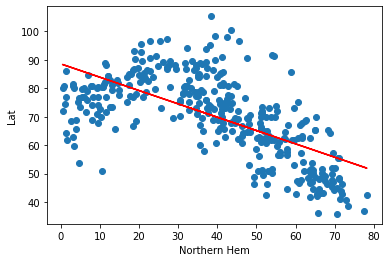

In [21]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Hem')
plt.ylabel('Lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
x = southern["Lat"]
y = southern["temp_max"]



R squared: 0.6088951127862103


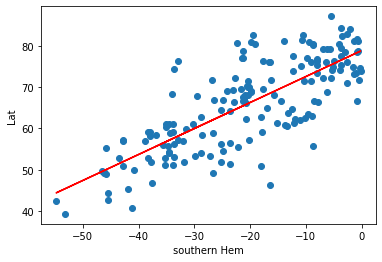

In [23]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('southern Hem')
plt.ylabel('Lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
x = northern["Lat"]
y = northern["humidity"]



R squared: 0.00014989179154060683


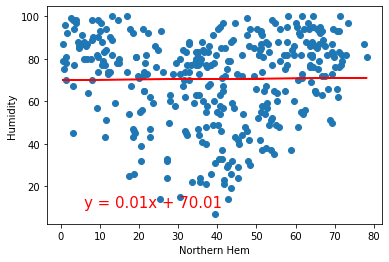

In [25]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Hem')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
x = southern["Lat"]
y = southern["humidity"]



R squared: 0.01785080137223059


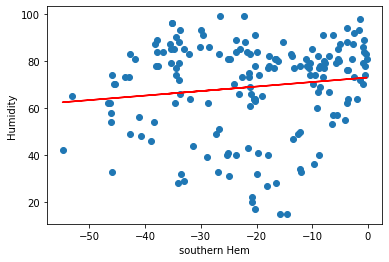

In [27]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('southern Hem')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
x = northern["Lat"]
y = northern["clouds"]

R squared: 0.006047210844044551


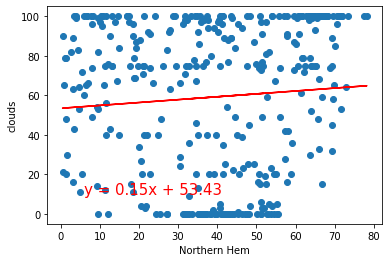

In [29]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Hem')
plt.ylabel('clouds')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
x = southern["Lat"]
y = southern["clouds"]

R squared: 0.0025419155567878147


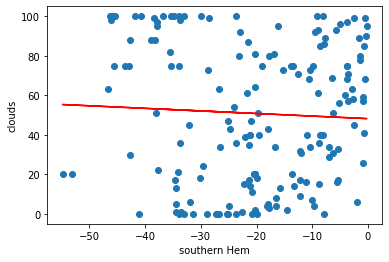

In [31]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('southern Hem')
plt.ylabel('clouds')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [32]:
x = northern["Lat"]
y = northern["speed"]

R squared: 0.005959467732450022


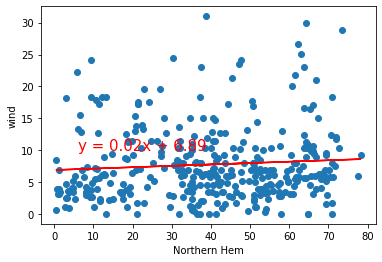

In [33]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Hem')
plt.ylabel('wind')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
x = southern["Lat"]
y = southern["speed"]

R squared: 0.024067996131375627


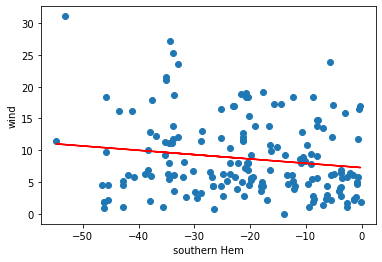

In [35]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('southern Hem')
plt.ylabel('wind')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

Observations

There is a strong coorelations between latitdute and temperature as expected

To my surpise there is more humidity coorelated with the northern hempisphere.

The greatest wind speeds seem to be at the greater ends of the latitude
